In [1]:
import numpy as np
import matplotlib.pyplot as plt

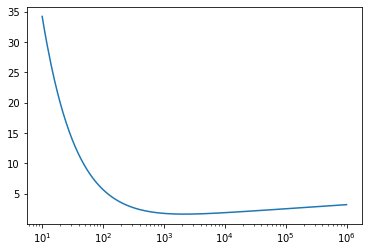

In [50]:
#---------------Constantes-----------------------------#
C0 = 0.3071
z = 1
Z = 13
A = 26.981539
me_c2 = 0.511*10**6
I=167

#---------------Beth-Bloch sin corregir-----------------------------#

def gamma(T,Er):
    return 1 + (T/Er)

def beta(T,Er):
    return (1-(1/gamma(T,Er)**2))**0.5

def Sp(T,Er):
    return (C0*Z*(z**2)/(A*beta(T,Er)**2))*(np.log(2*me_c2/I) + np.log(beta(T,Er)**2) - np.log(1-beta(T,Er)**2) - beta(T,Er)**2)


#---------------Plot-----------------------------#

Energy = np.arange(10,10**6, 1).tolist()
SpList = np.zeros(999990)
for i in range(999990):
    SpList[i] = Sp(Energy[i],938.25)
plt.xscale("log")
plt.plot(Energy, SpList)

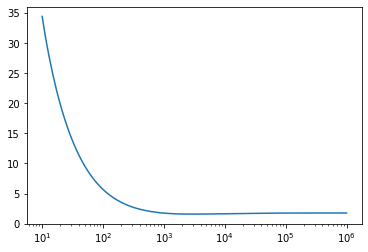

In [49]:
#---------------Beth-Bloch con correcciones-----------------------------#
def dens(T,Er):
    Co = -4.24
    a = 0.0802
    n = 3.63 
    X1 = 3.01
    X0 =0.1708
    X = np.log10(beta(T,Er)*gamma(T,Er))
    if(X<X0):
        return 0
    elif(X0<X<X1):
        return 4.6052*X + Co + a*(X1-X)**n
    else:
        return 4.6052*X + Co
    
def C(T,Er):
    b = beta(T,Er)
    g = gamma(T,Er)
    n = b*g
    c1 = (0.422377*n**-2 + 0.0304043*n**-4 - 0.00038106*n**-6)*(10**-6)*I**2 
    c2 =(3.850190*n**-2 + - 0.1667989*n**-4 - 0.00157955*n**-6)*(10**-9)*I**3
    return c1 +c2

def SpC(T,Er):
    return (C0*Z*(z**2)/(A*beta(T,Er)**2))*(np.log(2*me_c2/I) + np.log(beta(T,Er)**2) - np.log(1-beta(T,Er)**2) - beta(T,Er)**2 - dens(T,Er) - C(T,Er)/Z)

#---------------Plot-----------------------------#

Energy = np.arange(10,10**6, 1).tolist()
SpList = np.zeros(999990)
for i in range(999990):
    SpList[i] = SpC(Energy[i],938.25)    
plt.xscale("log")
plt.plot(Energy, SpList)